# Polars - A blazingly fast new Dataframe library

![picture](./static/polars-header.jpeg)

In this article we going to take a closer look at [Polars](https://github.com/ritchie46/polars). Polars is a new Dataframe library implemented in Rust with convenient Python bindings. The [benchmark of H2Oai](https://h2oai.github.io/db-benchmark/) shows that it is one of the fastest Dataframe library of the moment. From the Polars book: '_The goal of Polars is being a fast DataFrame library that utilizes the available cores on your machine. Its ideal use case is data too big for pandas and too small for spark. Similar to spark Polars consists of a query planner that may (and probably does) optimize your query in order to do less work or reduce memory usage._'. 

Polars offers both a eager and a lazy API. The lazy API is said to be 'somewhat similar to spark'. The lazy API allows the user to optimise the query before it is ran. Promising 'blazingly' fast performance.

In this article, we will do a first introduction in Python and work with some of the available functionalities of this new dataframe package to get an idea that it has to offer. In the first part of the article we will use the eager API from Polars and at the end we will use the lazy API to check the syntax and see the differences.

To explore the functionalities of Polars we are going to use the [Wine Review dataset](https://www.kaggle.com/zynicide/wine-reviews/) with 150k wine reviews with variety, location, winery, price, and descriptions.

You can download the dataset that we will use [on Kaggle](https://www.kaggle.com/zynicide/wine-reviews/?select=winemag-data_first150k.csv).

It is also possible to run the cells in this article by yourself and play around with the code along the way. You can find this article in a Jupyter notebook format on my [Github page](https://github.com/r-brink/polars-tutorial/blob/master/polars-tutorial.ipynb)

## Installing Polars

We can easily install Polars via Pypi with the following command 

`pip install polars==0.7.0`

In this article, we will specifically use the 0.7.0 release of Polars, because it is the latest more stable version. It is still in an early stage of development, so a lot may change till the first truly stable version; 1.0.

*Note: as a best practice, don't forget to create and activate your virtual environment before installing Polars*

## Import relevant packages

To work with Polars and start analysing the Wine Review dataset we are going to import two packages: Polars and Matplotlib.

In [1]:
import polars as pl
import matplotlib.pyplot as plt
%matplotlib inline

Fontconfig warning: ignoring UTF-8: not a valid region tag


Polars already offers many functionalities that we are already familiar if you have worked with Pandas before. We can find an overview, including examples (for most), in the [reference guide](https://ritchie46.github.io/polars/python/polars/index.html). 

Let's start with loading the dataset and start with our analyses.

In [9]:
data = pl.read_csv('winemag-data_first150k.csv')
print(type(data))

<class 'polars.internals.dataframe.frame.DataFrame'>


Now that the data is read into the dataframe. Let's have a closer look at the dataframe.

## Starting with the eager API

### Dataset inspection

In [10]:
data.shape

(150930, 11)

In [11]:
data.columns

['',
 'country',
 'description',
 'designation',
 'points',
 'price',
 'province',
 'region_1',
 'region_2',
 'variety',
 'winery']

In [12]:
data.dtypes

[polars.datatypes.Int64,
 polars.datatypes.Utf8,
 polars.datatypes.Utf8,
 polars.datatypes.Utf8,
 polars.datatypes.Int64,
 polars.datatypes.Float64,
 polars.datatypes.Utf8,
 polars.datatypes.Utf8,
 polars.datatypes.Utf8,
 polars.datatypes.Utf8,
 polars.datatypes.Utf8]

Below we use sample() to get random rows from the dataset to get a feeling of the data that is available. Polars also offers common functions like `head` and `tail` 

In [13]:
print(data.sample(n=5))

shape: (5, 11)
┌────────┬─────────┬───────────┬───────────┬─────┬────────────┬────────────┬───────────┬───────────┐
│        ┆ country ┆ descripti ┆ designati ┆ ... ┆ region_1   ┆ region_2   ┆ variety   ┆ winery    │
│ ---    ┆ ---     ┆ on        ┆ on        ┆     ┆ ---        ┆ ---        ┆ ---       ┆ ---       │
│ i64    ┆ str     ┆ ---       ┆ ---       ┆     ┆ str        ┆ str        ┆ str       ┆ str       │
│        ┆         ┆ str       ┆ str       ┆     ┆            ┆            ┆           ┆           │
╞════════╪═════════╪═══════════╪═══════════╪═════╪════════════╪════════════╪═══════════╪═══════════╡
│ 108226 ┆ Austria ┆ Smooth    ┆ Umriss    ┆ ... ┆ null       ┆ null       ┆ Blaufränk ┆ Feiler-Ar │
│        ┆         ┆ wine,     ┆           ┆     ┆            ┆            ┆ isch      ┆ tinger    │
│        ┆         ┆ with      ┆           ┆     ┆            ┆            ┆           ┆           │
│        ┆         ┆ softened  ┆           ┆     ┆            ┆            ┆

In [14]:
data.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
i64,str,str,str,i64,f64,str,str,str,str,str
0,"""US""","""This tremendou...","""Martha's Viney...",96,235.0,"""California""","""Napa Valley""","""Napa""","""Cabernet Sauvi...","""Heitz"""
1,"""Spain""","""Ripe aromas of...","""Carodorum Sele...",96,110.0,"""Northern Spain...","""Toro""",null,"""Tinta de Toro""","""Bodega Carmen ..."
2,"""US""","""Mac Watson hon...","""Special Select...",96,90.0,"""California""","""Knights Valley...","""Sonoma""","""Sauvignon Blan...","""Macauley"""
3,"""US""","""This spent 20 ...","""Reserve""",96,65.0,"""Oregon""","""Willamette Val...","""Willamette Val...","""Pinot Noir""","""Ponzi"""
4,"""France""","""This is the to...","""La Brûlade""",95,66.0,"""Provence""","""Bandol""",null,"""Provence red b...","""Domaine de la ..."


The dataset has a lot to offer. With 11 variables and over 150k rows there is a lot of data to analyse. We see a couple of variables that are interesting to look into, like `price`, `country`, `points`.

Before we continue we want to have a closer look if there are any `Nulls` in the dataset.

In [15]:
data.null_count()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,5,0,45735,0,13695,5,25060,89977,0,0


It seems that around a little less than 10% of the `price` variable has no value. We can either drop the rows with missing values or fill them. In this article, we will choose to use the mean as filling strategy.

In [9]:
data['price'] = data['price'].fill_none('mean')

### Some analyses

The next step is to dive in a little deeper and have a closer look at the dataset with some more complex functions.

The goal that we want to achieve in the following part is to have a closer look at the countries and how they compare in terms of price and points.

In [10]:
# Analyses of wine prices
print(f'Median price: {data["price"].median()}')
print(f'Average price: {data["price"].mean()}')
print(f'Maximum price: {data["price"].max()}')
print(f'Minimum price: {data["price"].min()}')

Median price: 26.0
Average price: 33.131482493532864
Maximum price: 2300.0
Minimum price: 4.0


In [11]:
# Analyses of wine points
print(f'Median points: {data["points"].median()}')
print(f'Average points: {data["points"].mean()}')
print(f'Maximum points: {data["points"].max()}')
print(f'Minimum points: {data["points"].min()}')

Median points: 88
Average points: 87.8884184721394
Maximum points: 100
Minimum points: 80


The minimum number of points shows that there is no such thing as bad wine.

In [12]:
# Get a list of unique countries that are in the dataset
data['country'].unique().to_list()

['Macedonia',
 'Ukraine',
 'Spain',
 'Israel',
 'Cyprus',
 'Germany',
 'China',
 'India',
 'South Korea',
 'Bosnia and Herzegovina',
 'Czech Republic',
 'Albania',
 '',
 'Moldova',
 'France',
 'Morocco',
 'Argentina',
 'Mexico',
 'Turkey',
 'Serbia',
 'Portugal',
 'Tunisia',
 'South Africa',
 'Lebanon',
 'Brazil',
 'Austria',
 'Bulgaria',
 'Croatia',
 'Italy',
 'Slovakia',
 'Greece',
 'Uruguay',
 'Switzerland',
 'US-France',
 'Lithuania',
 'Japan',
 'Hungary',
 'US',
 'Georgia',
 'Chile',
 'Luxembourg',
 'Australia',
 'Montenegro',
 'England',
 'Slovenia',
 'Romania',
 'New Zealand',
 'Egypt',
 'Canada']

In [13]:
print(f'There are {len(data["country"].unique())} countries in the list')

There are 49 countries in the list


There are two strange values in our dataset: an undefined country ("") and a country called 'US-France'.

In [14]:
data[(data['country'] == '') | (data['country'] == 'US-France')]

,country,description,designation,points,province,region_1,region_2,variety,winery,price
i64,str,str,str,i64,str,str,str,str,str,f64
1133,"""""","""Delicate white flowers and a spin of lemon peel on the nose start this refined white. The bright fruit on the palate is tropical and exotic, but the minerality gives it lift. Fuller-bodied but poised, the wine has aging potential and a food-friendly character.""","""Askitikos""",90,"""""","""""","""""","""Assyrtiko""","""Tsililis""",17
1440,"""""","""A blend of 60% Syrah, 30% Cabernet Sauvignon and 10% Merlot, this inky garnet-colored wine offers aromas of cassis and elderberry. On the palate, there is a combination of cooked fruit and cool spice flavors yet there is no lack of accompanying acidity. Flavors of cassis, elderberry, anise, orange peel and vanilla are backed by silky tannins that stay smooth into the cooling finish.""","""Shah""",90,"""""","""""","""""","""Red Blend""","""Büyülübağ""",30
68226,"""""","""From first sniff to last, the nose never makes much of an impression; the wine has funk and generic chemical aromas but also your basic red apple and char. Pretty big and aggressive in the mouth, with snaggy acids and rough tannins.""","""Piedra Feliz""",81,"""""","""""","""""","""Pinot Noir""","""Chilcas""",15
113016,"""""","""From first sniff to last, the nose never makes much of an impression; the wine has funk and generic chemical aromas but also your basic red apple and char. Pretty big and aggressive in the mouth, with snaggy acids and rough tannins.""","""Piedra Feliz""",81,"""""","""""","""""","""Pinot Noir""","""Chilcas""",15
135696,"""""","""From first sniff to last, the nose never makes much of an impression; the wine has funk and generic chemical aromas but also your basic red apple and char. Pretty big and aggressive in the mouth, with snaggy acids and rough tannins.""","""Piedra Feliz""",81,"""""","""""","""""","""Pinot Noir""","""Chilcas""",15
144054,"""US-France""","""Defies categorization, in more ways than one. The wine is a joint venture between Cold Heaven's Morgan Clendenen and Condrieu winemaker Yves Cuilleron, and is a 50-50 blend of their wines. The wine has California's sunny flavors (sunflowers, hay, pretty yellow fruit), and a full, rich, viscous Condrieu texture.""","""""",88,"""Santa Barbara County-Condrieu""","""""","""""","""Viognier""","""Deux C""",50


There were only 6 of them, so it was safe to drop them.

In [15]:
data = data[(data['country'] != '') & (data['country'] != 'US-France')]

Time to look into the countries that produces the best wine according to the points and has the hightest price for a bottle.

In [16]:
# We group by country, select the `points` variable and call the mean to see the average number of points. After that we sort the list by 'average points'. 
print(data.groupby('country').select('points').mean().sort(by_column='points_mean', reverse=True))

shape: (47, 2)
╭───────────────┬─────────────╮
│ country       ┆ points_mean │
│ ---           ┆ ---         │
│ str           ┆ f64         │
╞═══════════════╪═════════════╡
│ "England"     ┆ 92.889      │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ "Austria"     ┆ 89.277      │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ "France"      ┆ 88.926      │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ "Germany"     ┆ 88.626      │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ ...           ┆ ...         │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ "Slovakia"    ┆ 83.667      │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ "Brazil"      ┆ 83.24       │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ "Montenegro"  ┆ 82          │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ "China"       ┆ 82          │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ "South Korea" ┆ 81.5        │
╰───────────────┴─────────────╯


England is leading the list for the best wines. Wonder how they think about that on the other side of the Canal in France.

In [17]:
data.groupby('country').select('price').max().sort(by_column='price_max', reverse=True)

country,price_max
str,f64
"""France""",2300
"""US""",2013
"""Austria""",1100
"""Portugal""",980
"""Italy""",900
"""Australia""",850
"""Germany""",775
"""Spain""",770
"""Hungary""",764


### Plotting while using Polars

To get a better insight into the differences it always helps to have some nice plots. Where Pandas has a plotting functionality build in, we have to rely on our Matplotlib skills for Polars. We focus on the top 15 countries.

In [18]:
# Get a list of the top 15 countries by taking the first 15 rows of the groupby that we did earlier
top_15_countries = data.groupby('country').select('points').mean().sort(by_column='points_mean', reverse=True)[:15][0]

In [19]:
df_top15 = pl.DataFrame({'country': top_15_countries}).join(data, on='country', how='left')

Now that we have a top 15 countries, it is time to have a closer look at the distribution of points per `country`.

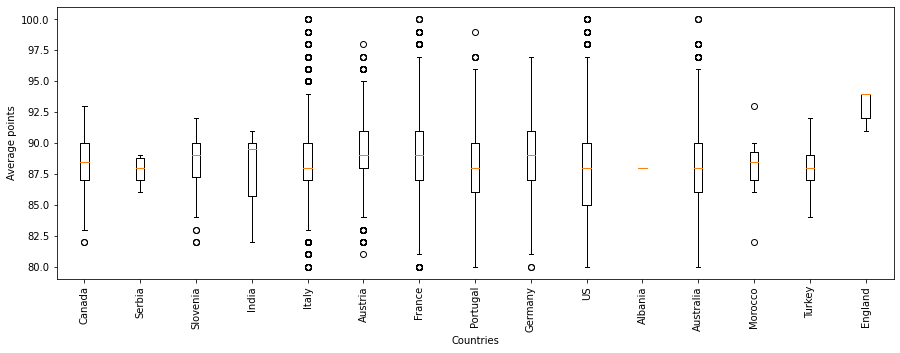

In [20]:
fig, ax = plt.subplots(figsize=(15, 5))

for i, x in enumerate(df_top15['country'].unique()):
    ax.boxplot(df_top15[df_top15['country'] == x]['points'], labels=[str(x)], positions=[i])

plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('Average points')
plt.show()

## Time to go lazy

The lazy API offers a way to optimise your queries, similar to Spark. The major benefit over spark is that we don't have to set up our environment and can therefore continue working from our notebook.

More information can be found in the [Polars-book](https://ritchie46.github.io/polars-book/lazy_polars/intro.html)

In [5]:
import polars as pl

In [6]:
lazy_df = pl.scan_csv('winemag-data.csv', ignore_errors=True)
print(type(lazy_df))

OSError: No such file or directory (os error 2)

Printing the type returns 'polars.lazy.LazyFrame' indicating the data is available to us. On to the groupby `country` and find the average `points` to compare with the eager API that we used earlier.

Similar to the filters that we did with the eager API we are going to filter the unknown and 'US-France' values in the `country` variable first.

In [23]:
lazy_df = (
    lazy_df
    .filter(col('country').str_lengths() > 0)
    .filter(col('country').str_contains(r'US-France').is_not())
)

As we can see nothing happens right away. From the documentation: '_This is due to the lazyness, nothing will happen until specifically requested. This allows Polars to see the whole context of a query and optimize just in time for execution._'

In [24]:
 lazy_df = (
    lazy_df
    .groupby('country')
    .agg([pl.mean('points').alias('avg_points')])
    .sort("avg_points", reverse=True)
)

As we can see the syntax of the lazy API is different from what we did in the beginning. Although it takes some getting used to the syntax gives a nice overview of the different steps we want to take.

To actually see the results we can do two things: `collect()` and `fetch()`. The difference is that `fetch` takes the first 500 rows and then runs the query, whereas `collect` runs the query over all the results. Below we can see the differences for our case.

In [25]:
print(lazy_df.collect())

shape: (47, 2)
╭───────────────┬────────────╮
│ country       ┆ avg_points │
│ ---           ┆ ---        │
│ str           ┆ f64        │
╞═══════════════╪════════════╡
│ "England"     ┆ 92.889     │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ "Austria"     ┆ 89.277     │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ "France"      ┆ 88.894     │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ "Germany"     ┆ 88.626     │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ ...           ┆ ...        │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ "Slovakia"    ┆ 83.667     │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ "Brazil"      ┆ 83.24      │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ "Montenegro"  ┆ 82         │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ "China"       ┆ 82         │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ "South Korea" ┆ 81.5       │
╰───────────────┴────────────╯


In [26]:
print(lazy_df.fetch())

shape: (19, 2)
╭────────────────┬────────────╮
│ country        ┆ avg_points │
│ ---            ┆ ---        │
│ str            ┆ f64        │
╞════════════════╪════════════╡
│ "Morocco"      ┆ 93         │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ "Israel"       ┆ 91         │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ "Australia"    ┆ 91         │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ "Germany"      ┆ 90.167     │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ ...            ┆ ...        │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ "South Africa" ┆ 86         │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ "US"           ┆ 82.481     │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ "Spain"        ┆ 72.579     │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ "New Zealand"  ┆ 47         │
├╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┤
│ "Bulgaria"     ┆ null       │
╰────────────────┴────────────╯


In [27]:
print(f'The length of collect() is {len(lazy_df.collect())}')
print(f'The length of fetch() is {len(lazy_df.fetch())}')

The length of collect() is 47
The length of fetch() is 19


## Output

We have got the output that we are looking for. Polars offers several ways to output our analyses, even to other formats useful for further analyses (e.g. pandas dataframe (`to_pandas()`) or numpy arrays (`to_numpy()`).

In [28]:
lazy_df.collect().to_csv('results.csv')

## Final word


Polars is a new package that is gaining a lot of attention. At the time of writing this article, it has gathered more than 1300 stars on Github, which is impressive looking at the fact that is around for less than a year. It offers almost all the functions that we need to manipulate our dataframe. Next to that, it offers a lazy API that helps us optimising our queries before we execute them. Although we didn't touch it is in this article, the benchmark of H20 shows that it is super efficient and fast. Especially with larger datasets it becomes worthwhile to look into the benefits that the lazy API has to offer.

I hope this article showed some of the potential Polars has to offer. There is a lot more to explore. The developer behind Polars is very responsive to issues. For (beginning) open source developers there are plenty of opportunities to contribute, both on the Python and Rust side. If you want to know more about the design decisions in Polars, I highly recommend [this blogpost](https://www.ritchievink.com/blog/2021/02/28/i-wrote-one-of-the-fastest-dataframe-libraries/) from the developer behind the package.

[link to Polars' Github page](https://github.com/ritchie46/polars)



![polars-logo](./static/polars-logo-dark.svg)